In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_excel(r'C:\Users\adity\Documents\Machine Learning\Miltivarite Regression\cars.xls')
df1

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [3]:
# pip install xlrd

In [4]:
df1.shape #dimensions of the dataset

(804, 12)

In [5]:
df1.columns # column names

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [6]:
df1.info() # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [7]:
df1.isnull().sum() # checking for missing values

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [8]:
df1.duplicated().sum() # checking for duplicate values

np.int64(0)

In [9]:
df1.head() # first 5 rows

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [10]:
df1.describe().T # summary statistics

,count,mean,std,min,25%,50%,75%,max
Price,804.0,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,19831.934080,8196.319707,266.000000,14623.50000,20913.500000,25213.000000,50387.000000
Cylinder,804.0,5.268657,1.387531,4.000000,4.00000,6.000000,6.000000,8.000000
Liter,804.0,3.037313,1.105562,1.600000,2.20000,2.800000,3.800000,6.000000
Doors,804.0,3.527363,0.850169,2.000000,4.00000,4.000000,4.000000,4.000000
Cruise,804.0,0.752488,0.431836,0.000000,1.00000,1.000000,1.000000,1.000000
Sound,804.0,0.679104,0.467111,0.000000,0.00000,1.000000,1.000000,1.000000
Leather,804.0,0.723881,0.447355,0.000000,0.00000,1.000000,1.000000,1.000000


In [11]:
print(df1['Make'].unique()) # unique values in the column
print(df1['Model'].unique()) # unique values in the column
df1['Type'].unique() # unique values in the column

['Buick' 'Cadillac' 'Chevrolet' 'Pontiac' 'SAAB' 'Saturn']
['Century' 'Lacrosse' 'Lesabre' 'Park Avenue' 'CST-V' 'CTS' 'Deville'
 'STS-V6' 'STS-V8' 'XLR-V8' 'AVEO' 'Cavalier' 'Classic' 'Cobalt'
 'Corvette' 'Impala' 'Malibu' 'Monte Carlo' 'Bonneville' 'G6' 'Grand Am'
 'Grand Prix' 'GTO' 'Sunfire' 'Vibe' '9_3' '9_3 HO' '9_5' '9_5 HO'
 '9-2X AWD' 'Ion' 'L Series']


array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Make', 'Model', 'Type']
for col in cols:
    df1[col] = le.fit_transform(df1[col])

In [13]:
cat_col = df1.select_dtypes(include='object').columns # categorical columns in the dataset
num_col = df1.select_dtypes(include=np.number).columns.tolist() # numerical columns in the dataset
print(cat_col)
print(num_col)

Index(['Trim'], dtype='object')
['Price', 'Mileage', 'Make', 'Model', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


In [31]:
import warnings
warnings.filterwarnings('ignore')

Price


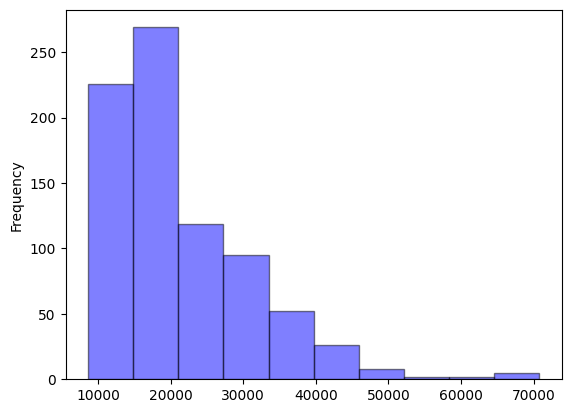

Mileage


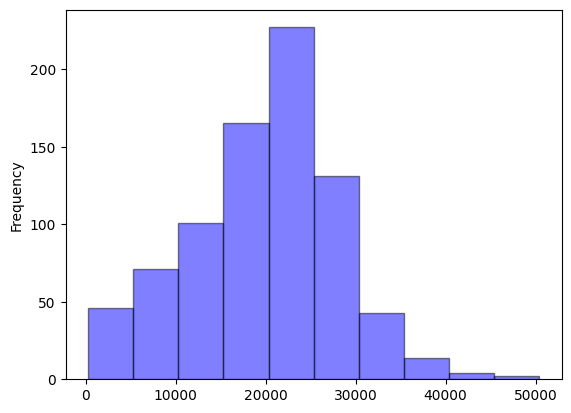

Make


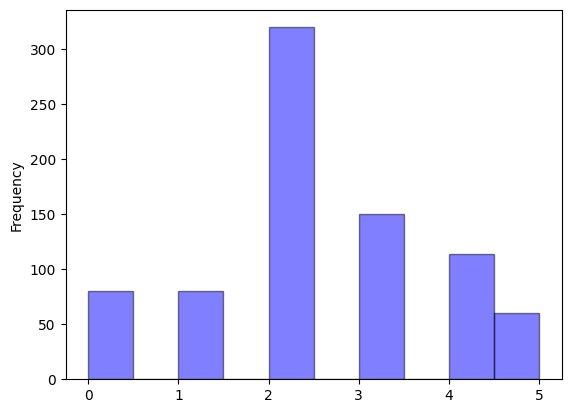

Model


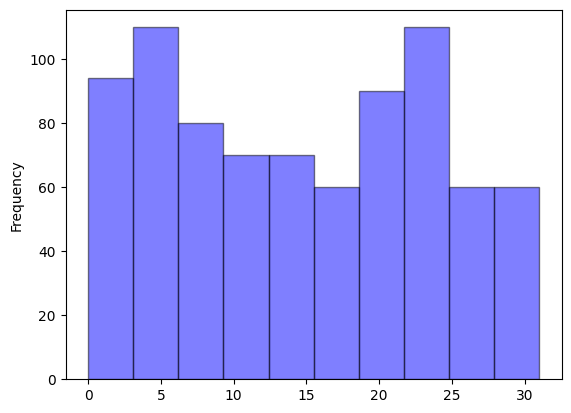

Type


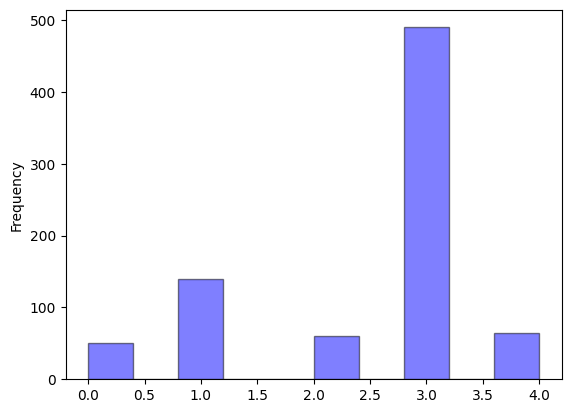

Cylinder


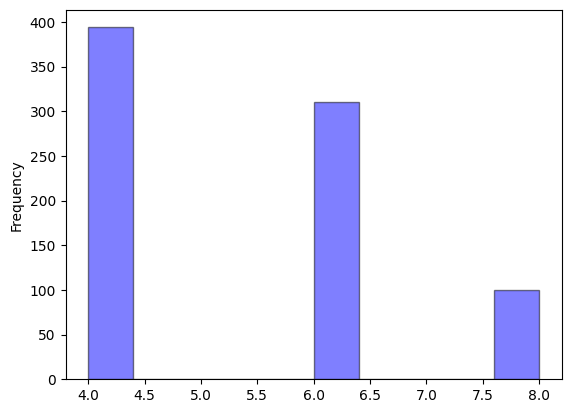

Liter


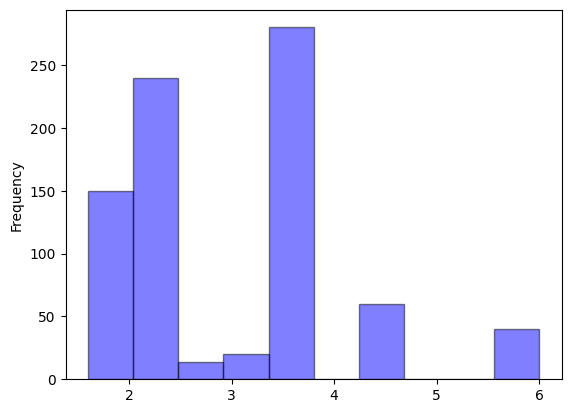

Doors


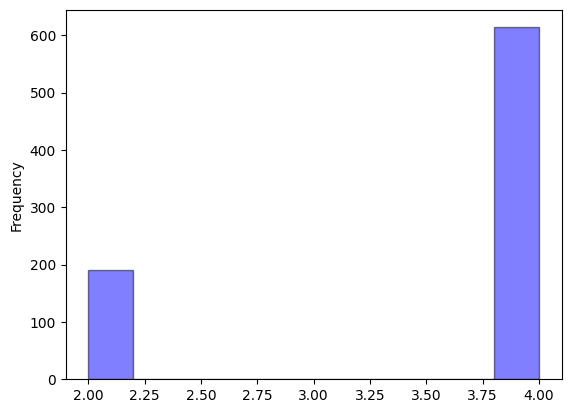

Cruise


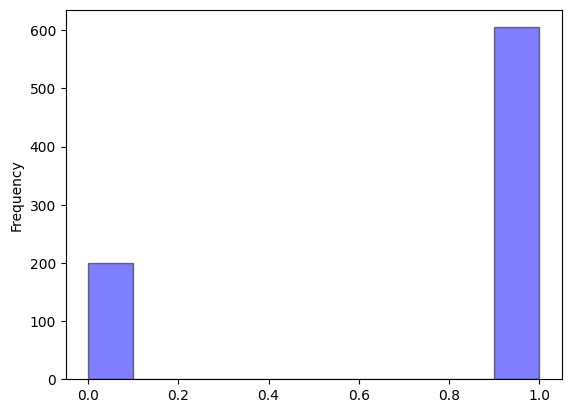

Sound


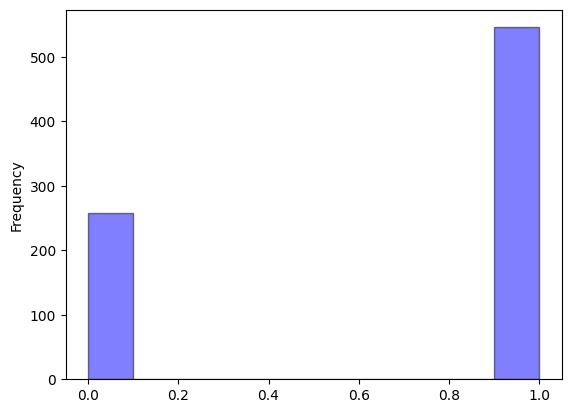

Leather


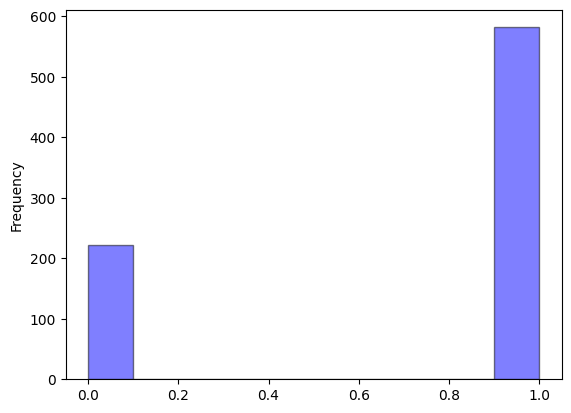

In [14]:
for col in num_col:
    print(col)
    
    plt.figure()
    plt.subplot(1,1,1)
    df1[col].hist(bins=10, alpha=0.5, color='blue', edgecolor='black', grid=False)
    plt.ylabel('Frequency')
    plt.show()

Trim


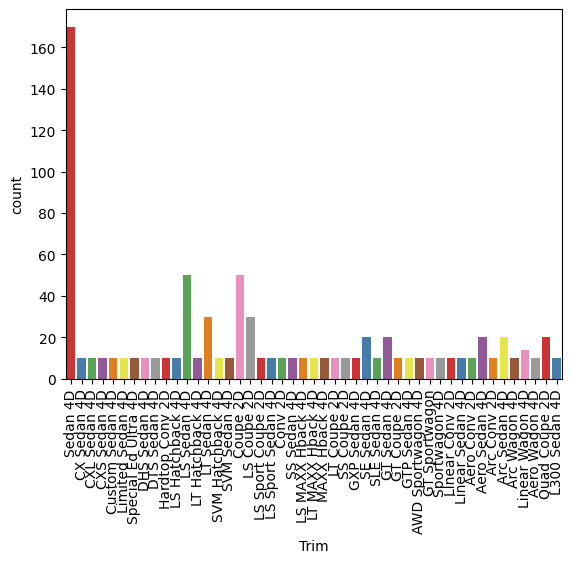

In [32]:
for col in cat_col:
    print(col)
    
    plt.figure()
    plt.subplot(1,1,1)
    sns.countplot(x=col, data=df1, palette="Set1")
    plt.xticks(rotation=90)
    plt.show()

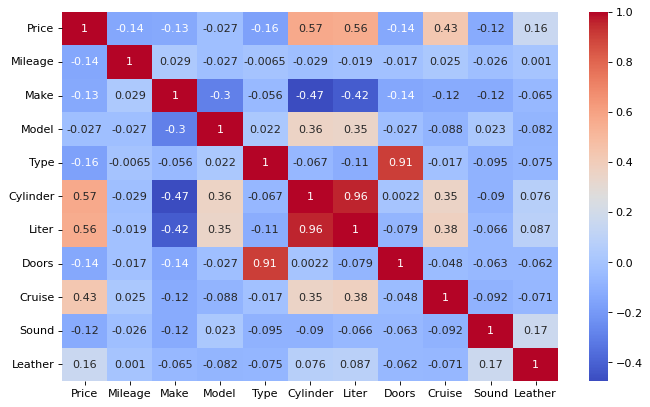

In [17]:
corr=df1[num_col].corr()

plt.figure(figsize=(10,6), dpi=80)
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

In [18]:
X = df1[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise' ,'Sound', 'Leather']]
y = df1['Price']

In [19]:
scale = StandardScaler()  # scaling the data
X = scale.fit_transform(X) 
X

array([[-1.41748516,  0.52741047,  0.05673638, ...,  0.57352037,
         0.68740634,  0.61761096],
       [-1.30590228,  0.52741047,  0.05673638, ...,  0.57352037,
         0.68740634, -1.61914225],
       [-0.81012759,  0.52741047,  0.05673638, ...,  0.57352037,
         0.68740634, -1.61914225],
       ...,
       [ 0.07960546,  0.52741047, -0.03377166, ...,  0.57352037,
         0.68740634, -1.61914225],
       [ 0.75044563,  0.52741047, -0.03377166, ...,  0.57352037,
         0.68740634, -1.61914225],
       [ 1.93256489,  0.52741047, -0.03377166, ...,  0.57352037,
        -1.45474364, -1.61914225]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)
y_pred

array([10348.42452391, 19290.31449972, 10080.65985545, 23225.38062645,
       28668.38487589,  8034.97679786, 16155.73712104, 11180.68886438,
       13618.835185  , 19235.49488168, 20535.78951921, 15053.1199156 ,
       21008.49617129, 22934.12822678, 18321.33406983, 24759.26881747,
       18581.22829323, 33665.11767046, 21140.88634484, 21317.80760937,
       22172.41487775, 25719.63722257, 19488.45512693, 10485.4468242 ,
       22719.4999298 , 21813.90987853, 23586.40076979, 19129.20798504,
       12199.53665335, 22086.80959624, 17077.17272892, 20532.40321226,
       16951.65103777, 20036.93989297, 25763.78114122, 27387.65330649,
       14150.56804613, 25046.25654851, 23071.45083537, 11907.89527572,
       23977.12116548, 19738.98783675, 16687.24172224, 24268.45027055,
       20710.06309622, 20030.70995658, 19053.8089645 , 22959.85215455,
       18295.09469234, 20059.01406841, 26872.55763934, 31971.255274  ,
        6932.92887243, 23221.61811817, 18270.20859484, 15894.45071146,
      

In [23]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('R2:', r2)

RMSE: 52349563.785972066
R2: 0.3399779340596436


In [24]:
print(f'Coefficents: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficents: [-1399.27375156  6873.37296253 -2335.1202695  -1534.38325372
  2759.57124775  -933.93749573  1465.98511778]
Intercept: 21390.798676492992


In [25]:
X = df1[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise' ,'Sound', 'Leather']]
y = df1['Price']

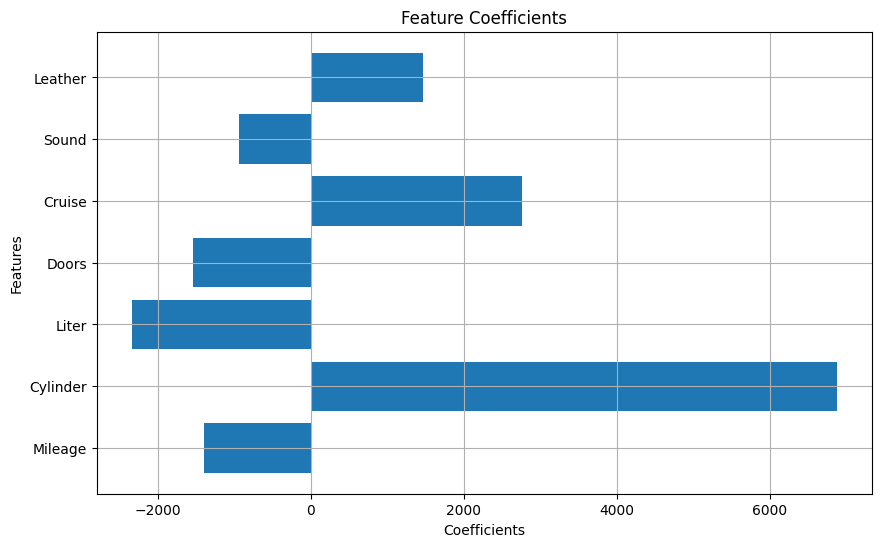

In [26]:
# plotting the coefficients
features = X.columns # Names of the features
coeffecients = model.coef_ # Coefficients of the model

plt.figure(figsize=(10, 6))
plt.barh(features, coeffecients)
plt.title('Feature Coefficients')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.grid(True)
plt.show()

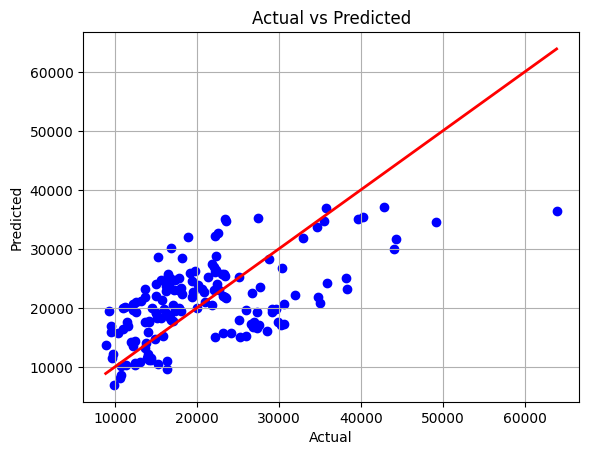

In [27]:
# plotting the actual vs predicted values
plt.Figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  #line of perfect fit
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show() 

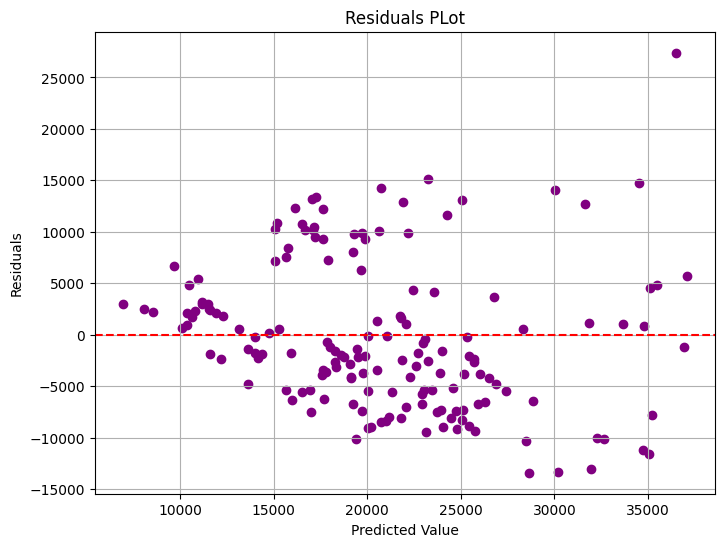

In [28]:
residuals = y_test - y_pred

# plotting the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--') # Horizontal line at y=0
plt.title('Residuals PLot')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [29]:
df1.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,Sedan 4D,3,6,3.1,4,1,0,1


In [30]:
#X = df1[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise' ,'Sound', 'Leather']]
new_data = [[45000, 8, 5.2, 4, 1, 1, 1]]
new_data = scale.transform(new_data)

#make peredictions
y_pred = model.predict(new_data)
y_pred

array([27051.79766531])